In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
df = pd.read_csv('/content/sample_data/forestfires.csv')
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [ ]:
df['area'].value_counts()

0.00      247
1.94        3
0.52        2
3.71        2
0.68        2
         ... 
105.66      1
154.88      1
196.48      1
200.94      1
11.16       1
Name: area, Length: 251, dtype: int64

In [ ]:
df = df.drop(['X', 'Y', 'month', 'day'], axis=1)

In [ ]:
df = df.apply(lambda x: (x - x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0)))

In [ ]:
df

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,0.000000
1,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,0.000000
2,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,0.000000
3,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,0.000000
4,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...
512,0.811613,0.191592,0.771315,0.033868,0.823151,0.200000,0.255556,0.00000,0.005904
513,0.811613,0.191592,0.771315,0.033868,0.633441,0.658824,0.600000,0.00000,0.049769
514,0.811613,0.191592,0.771315,0.033868,0.610932,0.647059,0.700000,0.00000,0.010231
515,0.976774,0.499311,0.711622,0.201426,0.752412,0.317647,0.400000,0.00000,0.000000


In [ ]:
df = pd.DataFrame(df, columns = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area'])

In [ ]:
df

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,0.000000
1,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,0.000000
2,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,0.000000
3,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,0.000000
4,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...
512,0.811613,0.191592,0.771315,0.033868,0.823151,0.200000,0.255556,0.00000,0.005904
513,0.811613,0.191592,0.771315,0.033868,0.633441,0.658824,0.600000,0.00000,0.049769
514,0.811613,0.191592,0.771315,0.033868,0.610932,0.647059,0.700000,0.00000,0.010231
515,0.976774,0.499311,0.711622,0.201426,0.752412,0.317647,0.400000,0.00000,0.000000


splitting data


In [ ]:
train = df.sample(317)
test = df.drop(df.index[df.index[train.index]])

In [ ]:
train_data=train.values
Y=train_data[:, -1].reshape(train_data.shape[0], 1)
X=train_data[:, :-1]

In [ ]:
test_data=test.values
Y_test=test_data[:, -1].reshape(test_data.shape[0], 1)
X_test=test_data[:, :-1]

In [ ]:
print("Shape of X_train :", X.shape)
print("Shape of Y_train :", Y.shape)
print("Shape of X_test :", X_test.shape)
print("Shape of Y_test :", Y_test.shape)

Shape of X_train : (317, 8)
Shape of Y_train : (317, 1)
Shape of X_test : (200, 8)
Shape of Y_test : (200, 1)


In [ ]:
X = np.vstack((np.ones((X.shape[0], )), X.T)).T
X_test = np.vstack((np.ones((X_test.shape[0], )), X_test.T)).T

In [ ]:
X

array([[1.        , 0.92258065, 0.33942109, ..., 0.34117647, 0.25555556,
        0.        ],
       [1.        , 0.86709677, 0.06340455, ..., 0.32941176, 0.6       ,
        0.        ],
       [1.        , 0.94709677, 0.33735355, ..., 0.44705882, 0.65555556,
        0.        ],
       ...,
       [1.        , 0.9316129 , 0.43211578, ..., 0.64705882, 0.35555556,
        0.        ],
       [1.        , 0.97419355, 0.40006892, ..., 0.34117647, 0.25555556,
        0.        ],
       [1.        , 0.96387097, 0.05582357, ..., 0.10588235, 0.6       ,
        0.        ]])

y = b0 + b1*month[i] + b2*FFMC[i] + b3*DMC[i] + b4*DC[i] + b5*ISI[i] +b6*temp[i]


minimize error
lost function = 1/m(E(y[i] - y[i])**2)


In [ ]:
def model(X, Y, learning_rate, iteration):
  m = Y.size
  theta = np.zeros((X.shape[1], 1))
  cost_list = []
  for i in range(iteration):
    y_pred = np.dot(X, theta)
    cost = (1/(2*m))*np.sum(np.square(y_pred - Y))
    d_theta = (1/m)*np.dot(X.T, y_pred - Y)
    theta = theta - learning_rate*d_theta
    cost_list.append(cost)
    # to print the cost for 10 times
    if(i%(iteration/10) == 0):
      print("Cost is :", cost)
  return theta, cost_list

In [ ]:
iteration = 10000
learning_rate = 0.000000005
theta, cost_list = model(X, Y, learning_rate = learning_rate, iteration = iteration)

Cost is : 0.0011456964290140243
Cost is : 0.0011456942006086777
Cost is : 0.0011456919722707083
Cost is : 0.0011456897440001142
Cost is : 0.0011456875157968933
Cost is : 0.0011456852876610432
Cost is : 0.0011456830595925618
Cost is : 0.0011456808315914477
Cost is : 0.001145678603657698
Cost is : 0.001145676375791311


In [ ]:
y_pred = np.dot(X, theta)
error = (1/X.shape[0])*np.sum(np.abs(y_pred - Y))

In [ ]:
print("Test error is :", error*100, "%")
print("Test Accuracy is :", (1- error)*100, "%")

Test error is : 1.1630152835148613 %
Test Accuracy is : 98.83698471648515 %


In [ ]:
y_pred

array([[1.81082648e-06],
       [1.42905339e-06],
       [1.95087882e-06],
       [1.84518473e-06],
       [2.09874778e-06],
       [1.88596984e-06],
       [1.47651702e-06],
       [1.94615426e-06],
       [1.88096830e-06],
       [1.94711195e-06],
       [2.02675793e-06],
       [1.91969201e-06],
       [1.93129295e-06],
       [1.86136969e-06],
       [1.76384152e-06],
       [2.21569251e-06],
       [1.74529060e-06],
       [1.78877441e-06],
       [1.88230754e-06],
       [1.43117424e-06],
       [1.87453689e-06],
       [2.01511501e-06],
       [1.38232379e-06],
       [1.87507249e-06],
       [1.96265718e-06],
       [1.82924974e-06],
       [1.87742584e-06],
       [2.09400668e-06],
       [2.05703047e-06],
       [1.97143210e-06],
       [1.94990492e-06],
       [1.80328412e-06],
       [1.88231337e-06],
       [1.76858101e-06],
       [1.95765291e-06],
       [1.38900442e-06],
       [1.82159955e-06],
       [1.91419874e-06],
       [1.99192324e-06],
       [1.83123305e-06],


In [ ]:
Y

array([[4.29943896e-03],
       [0.00000000e+00],
       [6.70125775e-03],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [9.17641451e-03],
       [0.00000000e+00],
       [3.61189542e-03],
       [1.60087639e-01],
       [0.00000000e+00],
       [0.00000000e+00],
       [3.40104873e-03],
       [0.00000000e+00],
       [1.01389755e-02],
       [3.20853654e-03],
       [0.00000000e+00],
       [3.60272817e-03],
       [1.60426827e-03],
       [0.00000000e+00],
       [1.41633970e-02],
       [0.00000000e+00],
       [6.69209050e-03],
       [0.00000000e+00],
       [0.00000000e+00],
       [4.97689854e-02],
       [2.53932749e-03],
       [0.00000000e+00],
       [7.58589711e-02],
       [1.76286165e-02],
       [0.00000000e+00],
       [0.00000000e+00],
       [7.33379781e-03],
       [3.32771076e-03],
       [0.00000000e+00],
       [2.90785083e-02],
       [1.46675956e-02],
       [7.24212533e-04],
       [1.41982326e-01],


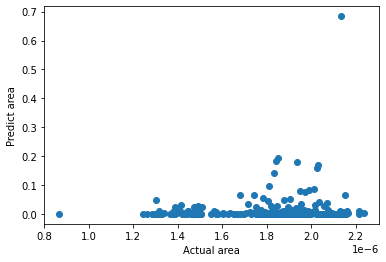

In [ ]:
plt.scatter(y_pred, Y)
plt.xlabel('Actual area')
plt.ylabel('Predict area')
plt.show()

USE LIBRARY SKLEARN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model

In [30]:
df = pd.read_csv('/content/sample_data/forestfires.csv')
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [31]:
df = df.drop(['X', 'Y', 'month', 'day'], axis=1)

In [32]:
from sklearn.preprocessing import MinMaxScaler
mc = MinMaxScaler()
df = mc.fit_transform(df)

In [33]:
df

array([[0.87096774, 0.08649207, 0.1013252 , ..., 0.7       , 0.        ,
        0.        ],
       [0.92774194, 0.11819435, 0.77541926, ..., 0.05555556, 0.        ,
        0.        ],
       [0.92774194, 0.14679531, 0.79629412, ..., 0.1       , 0.        ,
        0.        ],
       ...,
       [0.8116129 , 0.19159201, 0.77131465, ..., 0.7       , 0.        ,
        0.01023065],
       [0.97677419, 0.49931082, 0.71162191, ..., 0.4       , 0.        ,
        0.        ],
       [0.78451613, 0.00654721, 0.11586725, ..., 0.45555556, 0.        ,
        0.        ]])

In [34]:
df =pd.DataFrame(df, columns = ['FFMC',	'DMC',	'DC',	'ISI',	'temp',	'RH',	'wind',	'rain',	'area'])

In [35]:
df

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,0.000000
1,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,0.000000
2,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,0.000000
3,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,0.000000
4,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...
512,0.811613,0.191592,0.771315,0.033868,0.823151,0.200000,0.255556,0.00000,0.005904
513,0.811613,0.191592,0.771315,0.033868,0.633441,0.658824,0.600000,0.00000,0.049769
514,0.811613,0.191592,0.771315,0.033868,0.610932,0.647059,0.700000,0.00000,0.010231
515,0.976774,0.499311,0.711622,0.201426,0.752412,0.317647,0.400000,0.00000,0.000000


In [36]:
X = df[['FFMC',	'DMC',	'DC',	'ISI',	'temp',	'RH',	'wind',	'rain']]
y = df['area']

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 23)


In [38]:
X_train

,FFMC,DMC,DC,ISI,temp,RH,wind,rain
44,0.921290,0.281875,0.853524,0.110517,0.344051,0.694118,0.5,0.0
329,0.948387,0.348725,0.872053,0.149733,0.684887,0.141176,0.4,0.0
261,0.940645,0.383529,0.662718,0.158645,0.289389,0.811765,0.8,0.0
189,0.929032,0.147829,0.099097,0.098039,0.299035,0.529412,0.4,0.0
75,0.845161,0.019642,0.021930,0.137255,0.144695,0.752941,0.3,0.0
...,...,...,...,...,...,...,...,...
460,0.967742,0.792557,0.829366,0.149733,0.536977,0.576471,0.5,0.0
237,0.932903,0.442453,0.802979,0.124777,0.533762,0.294118,0.2,0.0
31,0.901935,0.312543,0.823267,0.126560,0.289389,0.741176,0.8,0.0
488,0.985806,0.483115,0.701184,0.315508,0.553055,0.658824,0.8,0.0


In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
lr  =LinearRegression()

In [41]:
lr.fit(X_train, y_train)

LinearRegression()

In [42]:
c = lr.intercept_
c

-0.009295807177874753

In [43]:
m = lr.coef_
m

array([ 0.00917657, -0.00394542,  0.00129151, -0.03313424,  0.03113196,
       -0.00748745,  0.01063793, -0.0841075 ])

In [44]:
y_pred = lr.predict(X_train)
y_pred

array([ 6.31959576e-03,  1.87162671e-02,  4.86377138e-03,  5.12659009e-03,
       -4.07873911e-03,  1.42358526e-02,  1.46931012e-02,  1.50164517e-02,
        1.91011295e-02,  1.04241122e-02, -1.63102867e-03,  9.35947679e-03,
        7.69648496e-03,  1.23118639e-02,  1.51367642e-02,  1.21458471e-02,
        1.59220541e-02,  8.85133827e-03,  4.87279021e-03,  5.66660573e-03,
        1.81221648e-02,  1.29067763e-02,  1.98629359e-02,  1.79858801e-02,
        1.55963124e-02,  1.58434033e-02,  8.93798056e-03,  2.38385472e-02,
        2.34297880e-02,  5.39412934e-03,  1.46635491e-02,  1.06230265e-02,
       -1.98527092e-04,  9.05897540e-03,  8.53728568e-03,  1.56400610e-02,
        1.36676611e-02,  1.33994085e-02,  1.51186535e-02,  1.82530908e-02,
        9.83886663e-03,  1.03511260e-02,  1.57066672e-02,  1.10551743e-02,
        2.12761383e-02,  1.44430496e-02,  1.32065660e-02,  6.37549686e-03,
        3.85093520e-03,  7.97926624e-03,  6.12275006e-03,  9.74028652e-03,
        1.44145429e-02,  

In [45]:
lr.predict([[86.2,	26.2,	94.3,	5.1,	8.2,	51,	6.7,	0.0	]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([0.57585554])